In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
from sklearn import preprocessing

In [12]:
(xTrain, yTrain), (xTest, yTest) = boston_housing.load_data()

In [13]:
xTrain.shape

(404, 13)

In [14]:
xTest.shape

(102, 13)

In [15]:
yTrain.shape

(404,)

In [16]:
yTest.shape

(102,)

In [20]:
print(xTrain[0])

[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]


In [21]:
print(yTrain[0])

15.2


In [23]:
xTrain = preprocessing.normalize(xTrain)
xTest = preprocessing.normalize(xTest)

In [28]:
xTrain[0]

array([0.0024119 , 0.        , 0.01592969, 0.        , 0.00105285,
       0.01201967, 0.17945359, 0.00778265, 0.00782786, 0.6007879 ,
       0.04109624, 0.77671895, 0.03663436])

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

In [60]:
def HousePricePredictions():
    
    model = Sequential()
    
    model.add(Dense(30, activation='relu', input_shape=(xTrain[0].shape)))
    model.add(Dense(1, activation='linear'))
    
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    
    return model

In [61]:
import numpy as np

In [62]:
k=4
sample_size = len(xTrain)
num_epocs = 100
all_scores = []

In [63]:
model = HousePricePredictions()

In [65]:
history = model.fit(xTrain, yTrain, epochs = num_epocs, batch_size=5, verbose=1, validation_data = (xTest, yTest))

#batch_size = 1 :- after every sample we backpropagate

Epoch 1/100
81/81 [==============================] - 1s 7ms/step - loss: 552.3133 - mae: 21.6259 - val_loss: 553.1625 - val_mae: 21.6795
Epoch 2/100
81/81 [==============================] - 0s 3ms/step - loss: 489.5071 - mae: 20.1172 - val_loss: 473.4649 - val_mae: 19.7571
Epoch 3/100
81/81 [==============================] - 0s 3ms/step - loss: 401.3207 - mae: 17.7833 - val_loss: 372.9802 - val_mae: 17.0414
Epoch 4/100
81/81 [==============================] - 0s 4ms/step - loss: 302.9436 - mae: 14.8298 - val_loss: 272.4789 - val_mae: 14.0197
Epoch 5/100
81/81 [==============================] - 0s 3ms/step - loss: 214.3815 - mae: 11.6378 - val_loss: 190.4645 - val_mae: 11.2077
Epoch 6/100
81/81 [==============================] - 0s 3ms/step - loss: 149.7910 - mae: 8.9881 - val_loss: 134.6629 - val_mae: 8.9647
Epoch 7/100
81/81 [==============================] - 0s 3ms/step - loss: 110.5249 - mae: 7.3552 - val_loss: 103.7101 - val_mae: 7.4855
Epoch 8/100
81/81 [==========================

81/81 [==============================] - 0s 4ms/step - loss: 56.5797 - mae: 5.2577 - val_loss: 55.7069 - val_mae: 5.4389
Epoch 63/100
81/81 [==============================] - 0s 4ms/step - loss: 56.4357 - mae: 5.2272 - val_loss: 55.6353 - val_mae: 5.4333
Epoch 64/100
81/81 [==============================] - 0s 4ms/step - loss: 56.3830 - mae: 5.2697 - val_loss: 55.7858 - val_mae: 5.4303
Epoch 65/100
81/81 [==============================] - 0s 4ms/step - loss: 56.2139 - mae: 5.1618 - val_loss: 55.5518 - val_mae: 5.4231
Epoch 66/100
81/81 [==============================] - 0s 4ms/step - loss: 56.0651 - mae: 5.1761 - val_loss: 55.4691 - val_mae: 5.4180
Epoch 67/100
81/81 [==============================] - 0s 4ms/step - loss: 55.8957 - mae: 5.1999 - val_loss: 55.3640 - val_mae: 5.4127
Epoch 68/100
81/81 [==============================] - 0s 4ms/step - loss: 55.8973 - mae: 5.1729 - val_loss: 55.0372 - val_mae: 5.4110
Epoch 69/100
81/81 [==============================] - 0s 4ms/step - loss: 5

In [73]:
yPred = model.predict(xTest)

4/4 [==============================] - 0s 3ms/step


In [74]:
yPred[0]

array([8.542499], dtype=float32)

In [75]:
yTest[0]

7.2

In [68]:
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mae']
val_mae = history.history['val_mae']

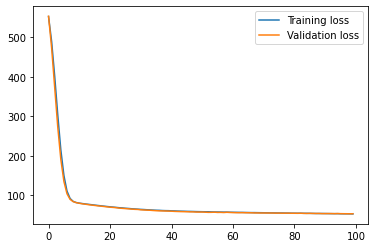

In [71]:
import matplotlib.pyplot as plt
plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.legend()
plt.show()


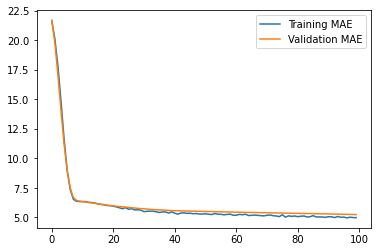

In [72]:
plt.plot(mae, label='Training MAE')
plt.plot(val_mae, label='Validation MAE')
plt.legend()
plt.show()

In [64]:
help(model.fit)

Help on method fit in module keras.engine.training:

fit(x=None, y=None, batch_size=None, epochs=1, verbose='auto', callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_batch_size=None, validation_freq=1, max_queue_size=10, workers=1, use_multiprocessing=False) method of keras.engine.sequential.Sequential instance
    Trains the model for a fixed number of epochs (iterations on a dataset).
    
    Args:
        x: Input data. It could be:
          - A Numpy array (or array-like), or a list of arrays
            (in case the model has multiple inputs).
          - A TensorFlow tensor, or a list of tensors
            (in case the model has multiple inputs).
          - A dict mapping input names to the corresponding array/tensors,
            if the model has named inputs.
          - A `tf.data` dataset. Should return a tuple
            of either `(inp